<a href="https://polly.elucidata.io/manage/workspaces?action=open_polly_notebook&amp;source=github&amp;path=ElucidataInc%2Fpolly-python%2Fblob%2Fmain%2FDiscover%2Fmeta_analysis_transcriptomics%2FGene+bio-markers+for+Medulloblastoma.ipynb&amp;kernel=elucidata%2FPython+3.10&amp;machine=medium" target="_parent"><img alt="Open in Polly" src="https://elucidatainc.github.io/PublicAssets/open_polly.svg"/></a>


## Objective:

Identify GEO datasets where Medulloblastoma samples are compared with Normal samples. 
'mycn' gene is differentially expressed.

## Install polly-python

In [1]:
! sudo pip3 install polly-python --quiet

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.22.74 requires PyYAML<5.5,>=3.10, but you have pyyaml 6.0 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.


## Import libraries and OA configuration

In [2]:
import os
from polly.auth import Polly
from polly.omixatlas import OmixAtlas

AUTH_TOKEN=(os.environ['POLLY_REFRESH_TOKEN']) # Obtain authentication tokens
Polly.auth(AUTH_TOKEN)

#Defining omixatlas object
omixatlas = OmixAtlas()

## Tables in the GDX atlas

In [3]:
q = "SHOW TABLES IN gdx_atlas"
omixatlas.query_metadata(q)

Query execution succeeded (time taken: 1.01 seconds, data scanned: 0.000 MB)
Fetched 2 rows


,table_name
0,gdx_atlas.datasets
1,gdx_atlas.features


## Get the schema of the GDX atlas

In [4]:
gdx_schema = omixatlas.get_schema('gdx_atlas', schema_level=['dataset'])

In [5]:
gdx_schema.dataset

,Source,Datatype,Field Name,Field Description,Field Type,Is Curated,Is Array
0,all,all,bucket,S3 bucket in which the data file resides,text,False,False
1,all,all,cohort_separability,Cohort separability in PCA,float,False,False
2,all,all,condition_column,Condition column from sample metadata,text,False,False
3,all,all,condition_control,condition_column value for control,text,False,True
4,all,all,condition_perturbation,condition_column value for perturbation,text,False,True
5,all,all,curated_cell_line,curated_cell_line,text,False,True
6,all,all,curated_cell_type,curated_cell_type,text,False,True
7,all,all,curated_disease,curated_disease,text,False,True
8,all,all,curated_drug,curated_drug,text,False,True
9,all,all,curated_gene,curated_gene,text,False,True


## Query GDX atlas

### 1. datasets table

In [6]:
q = """SELECT src_dataset_id, 
              src_description,
              condition_column,
              condition_control,
              condition_perturbation
       FROM gdx_atlas.datasets LIMIT 5"""
df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 1.76 seconds, data scanned: 0.060 MB)
Fetched 5 rows
(5, 5)


,src_dataset_id,src_description,condition_column,condition_control,condition_perturbation
0,GSE119157_GPL24247,Effect of norepinephrine and focal adhesion ki...,kw_curated_drug,[none],[(R)-noradrenaline]
1,GSE119167_GPL17543,Rbpj expression in regulatory T cells is criti...,kw_curated_disease,[Normal],[Myeloid splenomegaly]
2,GSE119169_GPL17543,Rbpj expression in regulatory T cells is criti...,kw_curated_disease,[Normal],[Myeloid splenomegaly]
3,GSE119207_GPL16686,Plucked hair follicles from patients with chro...,kw_curated_disease,[Normal],"[Lupus Erythematosus, Discoid]"
4,GSE119265_GPL18573,Early onset preeclampsia (EOPE) in a model for...,kw_curated_disease,[Normal],[Pre-Eclampsia]


### 2. features table

In [7]:
q = """SELECT *
       FROM gdx_atlas.features LIMIT 5"""
df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 3.77 seconds, data scanned: 59.085 MB)
Fetched 5 rows
(5, 17)


,avg_exp,p_value,src_repo,id_key,b,src_uri,gene,bh,src_dataset_id,version,log_fc,adj_p_val,timestamp_,t,data_id,name,is_current
0,6.979292,0.000374,gdx_atlas,kw_row_id,-3.967370,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,0.886917,0.999932,1657277152614,5.003541,kiaa1161,KIAA1161,True
1,3.884633,0.000423,gdx_atlas,kw_row_id,-3.974604,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,1.883600,0.999932,1657277152614,4.927506,cd14,CD14,True
2,2.566425,0.000457,gdx_atlas,kw_row_id,-3.979209,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,0.566650,0.999932,1657277152614,4.880098,dach1,DACH1,True
3,9.535658,0.000931,gdx_atlas,kw_row_id,-4.024778,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,-0.545550,0.999932,1657277152614,-4.447537,wars2,WARS2,True
4,5.316342,0.001668,gdx_atlas,kw_row_id,-4.065846,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,1.298983,0.999932,1657277152614,4.104426,fam53a,FAM53A,True


## PARAMS

In [8]:
condition_perturbation = 'Medulloblastoma'
condition_control = 'Normal'

## Get comparisons of interest

In [9]:
q = f"""SELECT 
              src_dataset_id, 
              src_description,
              condition_column,
              condition_control,
              condition_perturbation
       FROM 
              gdx_atlas.datasets
       WHERE
              CONTAINS(condition_perturbation,'{condition_perturbation}')
       AND 
              CONTAINS(condition_control,'{condition_control}')
       """
df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 2.04 seconds, data scanned: 0.239 MB)
Fetched 14 rows
(14, 5)


,src_dataset_id,src_description,condition_column,condition_control,condition_perturbation
0,GSE28192_GPL6102,MB_xenograft_models,kw_curated_disease,[Normal],[Medulloblastoma]
1,GSE33199_GPL1261,A mouse model of the most aggressive subgroup ...,kw_curated_disease,[Normal],[Medulloblastoma]
2,GSE39182_GPL6480,Epigenetic Silencing of DKK3 in Medulloblastoma.,kw_curated_disease,[Normal],[Medulloblastoma]
3,GSE46406_GPL11180,Pemetrexed and gemcitabine as combination ther...,kw_curated_disease,[Normal],[Medulloblastoma]
4,GSE62600_GPL96,Gene expression analysis of human medulloblast...,kw_curated_disease,[Normal],[Medulloblastoma]


## Query feature level info

After having identified the differential comparisons of interest, we would like to understand what genes are significantly regulated in a majority of those datasets. To do this, we count the number of differential comparisons a gene is found in, and along with that the average logFoldChange for that gene.

In [10]:
padj_cutoff = 0.05

q = f"""SELECT data_id AS gene, COUNT(src_dataset_id) AS dataset_count, 
              SUM(log_fc)/COUNT(src_dataset_id) AS log2FC_mean 
       FROM gdx_atlas.features 
       WHERE src_dataset_id IN 
           (SELECT dataset_id 
           FROM gdx_atlas.datasets 
           WHERE CONTAINS(condition_perturbation, '{condition_perturbation}')
           AND CONTAINS(condition_control, '{condition_control}'))
           AND adj_p_val < {padj_cutoff}
       GROUP BY data_id
       ORDER BY dataset_count DESC"""

df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 4.95 seconds, data scanned: 165.078 MB)
Fetched 37434 rows
(37434, 3)


,gene,dataset_count,log2FC_mean
0,ppip5k1,11,-0.342860
1,ncapd2,11,1.197678
2,arpp21,11,-0.996196
3,map4k4,10,1.214604
4,egfr,10,0.006275


## Rank the genes by combining avg log2FC and count of the genes into a single metric

In [11]:
df['importance'] = df['dataset_count']*df['log2FC_mean']
df = df.sort_values(by='importance', ascending=False)
df.index = df['gene']
df.head(20)

,gene,dataset_count,log2FC_mean,importance
gene,,,,
mycn,mycn,8,4.482495,35.859962
lhx2,lhx2,7,3.712369,25.986586
sox11,sox11,8,2.646387,21.171099
insm1,insm1,6,3.434770,20.608621
top2a,top2a,5,4.055910,20.279550
cenpf,cenpf,4,5.064936,20.259744
dcc,dcc,8,2.521027,20.168217
tbx1,tbx1,6,3.355053,20.130315
ccnb2,ccnb2,5,3.818996,19.094980


Text(0.5, 1.0, 'Medulloblastoma markers')

<Figure size 1080x720 with 0 Axes>

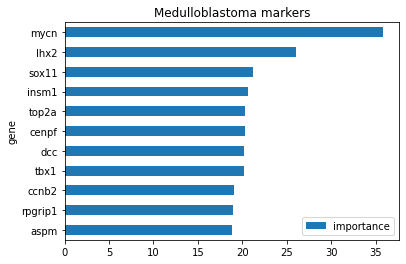

In [12]:
plt.figure(figsize=(15,10))
df.iloc[range(10,-1,-1)].plot.barh(x='gene', y='importance')
plt.title(f'{condition_perturbation} markers')